In [1]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt
import numpy as np

2021-11-18 22:15:17.894366: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-18 22:15:17.894390: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
boston = keras.datasets.boston_housing
(train_X, train_y), (test_X, test_y) = boston.load_data()

In [3]:
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(404, 13)
(404,)
(102, 13)
(102,)


In [4]:
mean = train_X.mean(axis=0)
std = train_X.std(axis=0)
train_X_std = (train_X - mean) / std
test_X_std = (test_X - mean) / std

In [13]:
model = Sequential()
model.add(
    Dense(
        128, 
        activation="relu",
        kernel_regularizer=l2(0.01),
    )
)
model.add(Dropout(.3))
model.add(
    Dense(
        128, 
        activation="relu",
        kernel_regularizer=l2(0.01),
    )
)
model.add(Dropout(.3))
model.add(
    Dense(
        64, 
        activation="relu",
        kernel_regularizer=l2(0.01),
    )
)
model.add(Dropout(.3))
model.add(
    Dense(
        1, 
        activation="linear",
        kernel_regularizer=l2(0.01),
    )
)
    

In [14]:
model.compile(
    optimizer="adam",
    loss="mean_squared_error",
    metrics=["mean_absolute_error"]
)


In [15]:
batch_size = 16
epochs = 500

model.fit(
    x=train_X_std, 
    y=train_y, 
    batch_size=batch_size, 
    epochs=epochs, 
    validation_data=(test_X_std, test_y),
    verbose=0,
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               1792      
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                

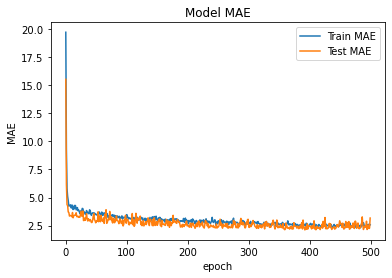

Min test MAE: 2.119


In [16]:
# summarize history for accuracy
mae = model.history.history['mean_absolute_error']
val_mae = model.history.history['val_mean_absolute_error']
plt.plot(mae)
plt.plot(val_mae)
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend(['Train MAE', 'Test MAE'])
plt.show()
print("Min test MAE: {:.3f}".format(np.min(val_mae)))

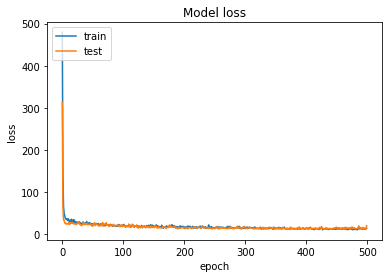

Min Loss: 12.02


In [17]:
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', "test"], loc='upper left')
plt.show()
print("Min Loss: {:.2f}".format(np.min(val_loss)))

In [18]:
# Print first 4 predictions.
predictions = model.predict(test_X_std)
for i in range(0, 4):
    print('Prediction: ', predictions[i],
          ', true value: ', test_y[i])


Prediction:  [9.172976] , true value:  7.2
Prediction:  [18.282] , true value:  18.8
Prediction:  [19.659336] , true value:  19.0
Prediction:  [27.742386] , true value:  27.0
